### 0. Data Inspection:
Dataset metadata:

In [2]:
import pandas as pd

# Load the .dta file
df = pd.read_stata("data-exercise-02-nls.dta")
reader = pd.read_stata("data-exercise-02-nls.dta", iterator=True)

# Get variable labels
print("Dataset variables labels:\n")
var_labels = reader.variable_labels()
for var, label in var_labels.items():
    print(f"{var}: {label}")

Dataset variables labels:

wage: monthly earnings
hours: average weekly hours
IQ: IQ score
educ: years education
exper: years of work experience
tenure: years with current employer
age: age
married: =1 if married
black: =1 if black
south: =1 if south
urban: 
sibs: number of siblings
brthord: birth order
meduc: mother's education
feduc: father's education


### Data Inspection:
How many individuals are there in the dataset?  
What is the age range?  
What proportion is black?  
What are the mean and median monthly earnings?

In [3]:
# Data Inspection:
print("Dataset inspection:\n")
# How many individuals are in the dataset?
print('Number of Inidviduals:',df.shape[0])
print("------")
# ------
# What is the age range?
print(f"The age range: \n Minimum age is: {df['age'].min()}\n Maximum age is: {df['age'].max()}")
print("------")
# ------
# What proportion is black?
black_proportion = df['black'].mean()
black_proportion = round(black_proportion,2)
print(f"{black_proportion:.2f} % of the population is defined as Black")
print("------")
# ------
# What are the mean and median monthly earnings?
print(f"The mean earing is: {df['wage'].mean():.2f}")
print(f"The meadian for earnings is: {df['wage'].median():.2f}")

Dataset inspection:

Number of Inidviduals: 935
------
The age range: 
 Minimum age is: 28.0
 Maximum age is: 38.0
------
0.13 % of the population is defined as Black
------
The mean earing is: 957.95
The meadian for earnings is: 905.00


### 2. Descriptive Statistics:
Relations:
earnings vs IQ

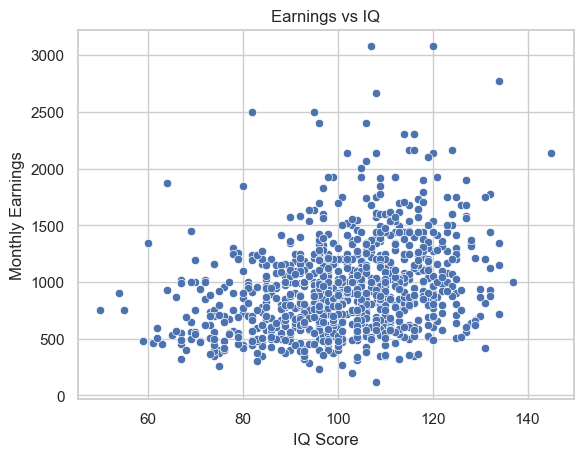

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: improve visuals
sns.set(style='whitegrid')

sns.scatterplot(x='IQ', y='wage', data=df)
plt.title("Earnings vs IQ")
plt.xlabel("IQ Score")
plt.ylabel("Monthly Earnings")
plt.show()

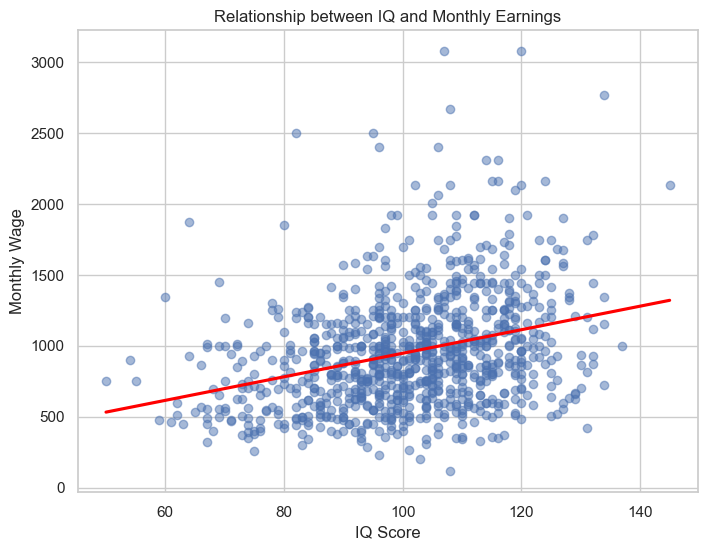

In [10]:
plt.figure(figsize=(8, 6))
sns.regplot(x='IQ',
            y='wage', 
            data=df, 
            ci=None, 
            scatter_kws={'alpha': 0.5},  
            line_kws={'color': 'red'}
           )
plt.title("Relationship between IQ and Monthly Earnings")
plt.xlabel("IQ Score")
plt.ylabel("Monthly Wage")
plt.show()

Relations:
Earnings vs Education

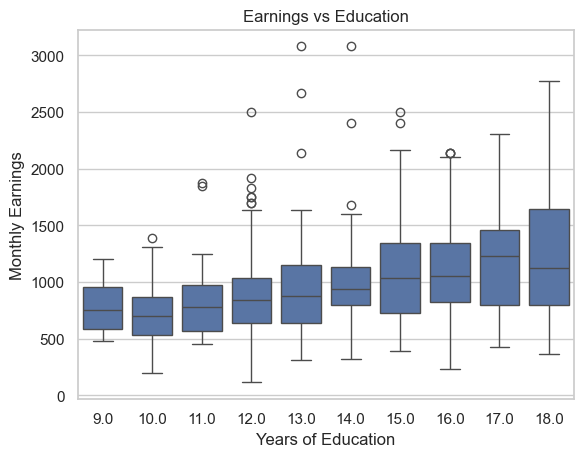

In [5]:
sns.boxplot(x='educ', y='wage', data=df)
plt.title("Earnings vs Education")
plt.xlabel("Years of Education")
plt.ylabel("Monthly Earnings")
plt.show()

Earnings vs Experince:

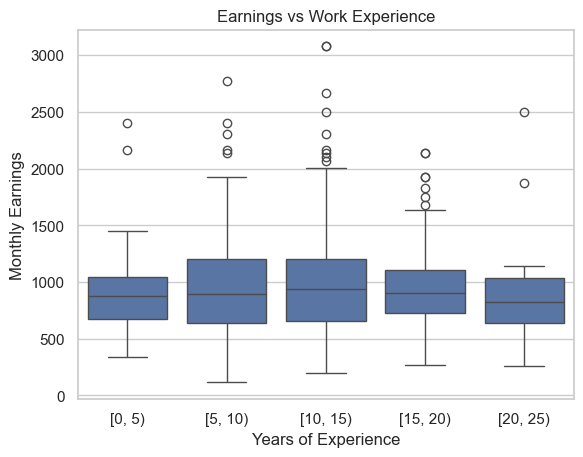

In [6]:
# Create 5-year bins (0-4, 5-9, ..., etc.)
df['exper_bucket'] = pd.cut(df['exper'], bins=range(0, int(df['exper'].max()) + 6, 5),
                            right=False, include_lowest=True)

sns.boxplot(x='exper_bucket', y='wage', data=df)
plt.title("Earnings vs Work Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Monthly Earnings")
plt.show()

Education vs IQ:

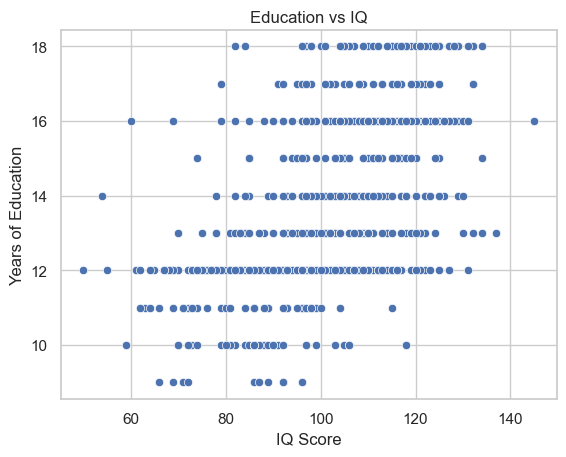

In [11]:
sns.scatterplot(x='IQ', y='educ', data=df)
plt.title("Education vs IQ")
plt.xlabel("IQ Score")
plt.ylabel("Years of Education")
plt.show()

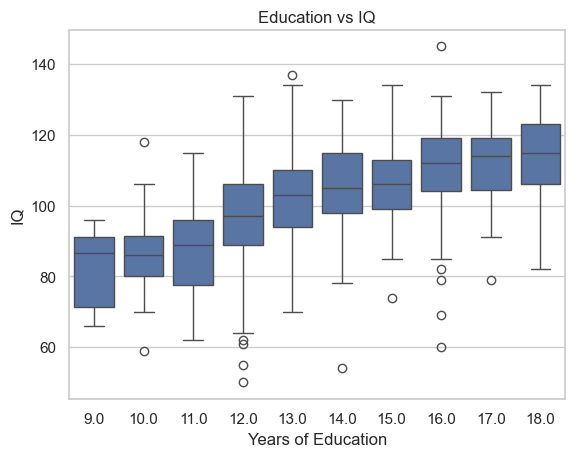

In [15]:
sns.boxplot(x='educ', y='IQ', data=df)
plt.title("Education vs IQ")
plt.xlabel("Years of Education")
plt.ylabel("IQ")
plt.show()

### Regressions:
Inspectiong the relation between income and education

In [3]:
import statsmodels.api as sm

# Define X and y
X = df['educ']
y = df['wage']

# Add a constant (for the intercept)
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Show regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           9.35e-25
Time:                        09:22:08   Log-Likelihood:                -6885.5
No. Observations:                 935   AIC:                         1.377e+04
Df Residuals:                     933   BIC:                         1.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.9524     77.715      1.891      0.0

In [4]:
import statsmodels.api as sm

# Define independent variables
X = df[['educ', 'tenure']]  # ⬅️ include both variables
y = df['wage']

# Add constant for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     67.58
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           3.92e-28
Time:                        09:24:29   Log-Likelihood:                -6875.1
No. Observations:                 935   AIC:                         1.376e+04
Df Residuals:                     932   BIC:                         1.377e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5195     79.557      0.673      0.5